node2  {'pos': (100, 1100)}
node2  {'pos': (812, 570)}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'pos': (100, 1100)}
node2  {'pos': (812, 570)}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'pos': (100, 1100)}
node2  {'pos': (812, 570)}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'pos': (100, 1100)}
node2  {'pos': (812, 570)}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}
node2  {'obstacle': True}


NetworkXError: Node (450, 518) has no position.

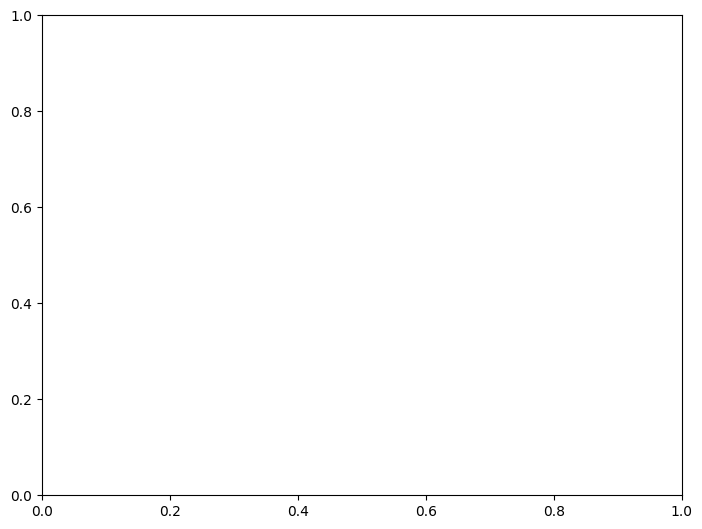

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建地图
G = nx.Graph()

# 添加节点
G.add_node("start", pos=(100, 1100))
G.add_node("end", pos=(812, 570))

# 添加边
G.add_edge("start", "end")

# 添加装置位置作为障碍物
obstacles = [
    {"pos": (450, 518), "size": (450, 60)},
    {"pos": (812, 555), "size": (59, 48)}
]

for obstacle in obstacles:
    x, y = obstacle["pos"]
    w, h = obstacle["size"]
    obstacle_nodes = [
        (x, y), (x + w, y), (x, y + h), (x + w, y + h)
    ]
    for node in obstacle_nodes:
        G.add_node(node, obstacle=True)

# 添加节点之间的连线（边）
for node1 in G.nodes():
    # pos1 = G.nodes[node1]["pos"]
    if 'pos' in G.nodes[node1]:
        pos1 = G.nodes[node1]["pos"]

    for node2 in G.nodes():
        print("node2 ", G.nodes[node2])
        if 'pos' in G.nodes[node2]:
            pos2 = G.nodes[node2]["pos"]
            if node1 != node2 and not G.nodes[node1].get("obstacle") and not G.nodes[node2].get("obstacle"):
                distance = ((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2) ** 0.5
                G.add_edge(node1, node2, weight=distance)

# 使用 A* 算法寻找路径
path = nx.astar_path(G, "start", "end", heuristic=lambda u, v: ((G.nodes[u]["pos"][0] - G.nodes[v]["pos"][0]) ** 2 + (
        G.nodes[u]["pos"][1] - G.nodes[v]["pos"][1]) ** 2) ** 0.5)

# 提取路径的转折点坐标
turning_points = [G.nodes[node]["pos"] for node in path]

# 绘制地图和路径
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue')
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=200)
nx.draw_networkx_nodes(G, pos, nodelist=["start", "end"], node_color='green', node_size=200)
nx.draw_networkx_edges(G, pos)
plt.show()

# 输出路径的转折点坐标
print("路径的转折点坐标：", turning_points)


In [14]:
import numpy as np
import queue

# 创建表示二维平面的网格地图
width, height = 2000, 1500
grid = np.zeros((width, height))

# 标记装置的区域为障碍物
obstacle1_x, obstacle1_y, obstacle1_width, obstacle1_height = 450, 518, 450, 60
obstacle2_x, obstacle2_y, obstacle2_width, obstacle2_height = 812, 555, 59, 48
grid[obstacle1_x:obstacle1_x + obstacle1_width, obstacle1_y:obstacle1_y + obstacle1_height] = 1
grid[obstacle2_x:obstacle2_x + obstacle2_width, obstacle2_y:obstacle2_y + obstacle2_height] = 1

# 定义起点和终点
start = (100, 1100)
goal = (812, 570)


# 定义A*算法
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar(array, start, goal):
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    queue.PriorityQueue.put(oheap, (fscore[start], start))

    while oheap:
        current = queue.PriorityQueue.get(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                queue.PriorityQueue.put(oheap, (fscore[neighbor], neighbor))

    return False


# 计算最优路径
path = astar(grid, start, goal)
print(path)

AttributeError: 'list' object has no attribute 'not_full'

In [16]:
import numpy as np
import queue

# 创建表示二维平面的网格地图
width, height = 2000, 1500
grid = np.zeros((width, height))

# 标记装置的区域为障碍物
obstacle1_x, obstacle1_y, obstacle1_width, obstacle1_height = 450, 518, 450, 60
obstacle2_x, obstacle2_y, obstacle2_width, obstacle2_height = 812, 555, 59, 48
grid[obstacle1_x:obstacle1_x + obstacle1_width, obstacle1_y:obstacle1_y + obstacle1_height] = 1
grid[obstacle2_x:obstacle2_x + obstacle2_width, obstacle2_y:obstacle2_y + obstacle2_height] = 1

# 定义起点和终点
start = (100, 1100)
goal = (812, 570)


# 定义A*算法
def heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


def astar(array, start, goal):
    neighbors = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    queue.PriorityQueue.put(oheap, (fscore[start], start))

    while oheap:
        current = queue.PriorityQueue.get(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    continue
            else:
                continue

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue

            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                queue.PriorityQueue.put(oheap, (fscore[neighbor], neighbor))

    return False


# 计算最优路径
path = astar(grid, start, goal)
print(path)

AttributeError: 'list' object has no attribute 'not_full'

['start', 'end', (450, 518), (900, 518), (450, 578), (900, 578), (812, 555), (871, 555), (812, 603), (871, 603)]


NetworkXError: Node (450, 518) has no position.

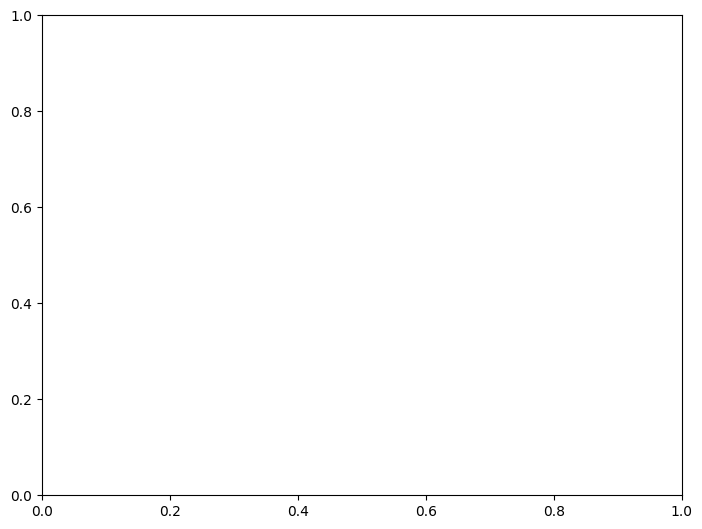

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建地图
G = nx.Graph()

# 添加节点
G.add_node("start", pos=(100, 1100), obstacle=False)
G.add_node("end", pos=(812, 570), obstacle=False)

# 添加边
G.add_edge("start", "end")

# 添加装置位置作为障碍物
obstacles = [
    {"pos": (450, 518), "size": (450, 60)},
    {"pos": (812, 555), "size": (59, 48)}
]

for index, obstacle in enumerate(obstacles):
    x, y = obstacle["pos"]
    w, h = obstacle["size"]
    obstacle_nodes_pos = [
        (x, y), (x + w, y), (x, y + h), (x + w, y + h)
    ]
    for node in obstacle_nodes_pos:
        G.add_node(node, obstacle=True)

print(G.nodes())
# 添加节点之间的连线（边）
for node1 in G.nodes():
    pos1 = None
    pos2 = None
    if 'pos' in G.nodes[node1]:
        pos1 = G.nodes[node1]["pos"]
    for node2 in G.nodes():
        if 'pos' in G.nodes[node2]:
            pos2 = G.nodes[node2]["pos"]

        if pos1 is not None and pos2 is not None:
            if node1 != node2 and not G.nodes[node1].get("obstacle") and not G.nodes[node2].get("obstacle"):
                distance = ((pos1[0] - pos2[0]) ** 2 + (pos1[1] - pos2[1]) ** 2) ** 0.5
                G.add_edge(node1, node2, weight=distance)

# 使用 A* 算法寻找路径
path = nx.astar_path(G, "start", "end", heuristic=lambda u, v: ((G.nodes[u]["pos"][0] - G.nodes[v]["pos"][0]) ** 2 + (
        G.nodes[u]["pos"][1] - G.nodes[v]["pos"][1]) ** 2) ** 0.5)

# 提取路径的转折点坐标
turning_points = [G.nodes[node]["pos"] for node in path]

# 绘制地图和路径
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=100, node_color='lightblue')
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=200)
nx.draw_networkx_nodes(G, pos, nodelist=["start", "end"], node_color='green', node_size=200)
nx.draw_networkx_edges(G, pos)
plt.show()

# 输出路径的转折点坐标
print("路径的转折点坐标：", turning_points)


In [26]:
import math
import heapq


# 定义障碍物
def is_obstacle(x, y):
    for obstacle in obstacles:
        if obstacle.x1 <= x <= obstacle.x2 and obstacle.y1 <= y <= obstacle.y2:
            return True
    return False


# 定义 A* 寻路算法
class AStar:
    def __init__(self, start, goal, obstacles):
        self.start = start
        self.goal = goal
        self.obstacles = obstacles

        self.open = []
        self.closed = set()

        self.g_score = {}
        self.f_score = {}

        self.g_score[start] = 0
        self.f_score[start] = self.calculate_f_score(start)

    def calculate_f_score(self, node):
        return self.g_score[node] + self.calculate_h_score(node)

    def calculate_h_score(self, node):
        return math.sqrt((node[0] - self.goal[0]) ** 2 + (node[1] - self.goal[1]) ** 2)

    def get_neighbors(self, node):
        neighbors = []
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                new_x = node[0] + dx
                new_y = node[1] + dy

                if 0 <= new_x < 2000 and 0 <= new_y < 1500 and not is_obstacle(new_x, new_y):
                    neighbors.append((new_x, new_y))
        return neighbors

    def add_to_open(self, node):
        heapq.heappush(self.open, (self.f_score[node], node))

    def get_from_open(self):
        _, node = heapq.heappop(self.open)
        self.closed.add(node)
        return node

    def is_in_open(self, node):
        return node in self.open

    def is_in_closed(self, node):
        return node in self.closed

    def run(self):
        while self.open:
            node = self.get_from_open()

            if node == self.goal:
                return self.reconstruct_path(node)

            for neighbor in self.get_neighbors(node):
                if not self.is_in_closed(neighbor):
                    g_score = self.g_score[node] + 1

                    if not self.is_in_open(neighbor) or g_score < self.g_score[neighbor]:
                        self.g_score[neighbor] = g_score
                        self.f_score[neighbor] = self.calculate_f_score(neighbor)

                        if not self.is_in_open(neighbor):
                            self.add_to_open(neighbor)

        return None

    def reconstruct_path(self, node):
        path = []
        while node != self.start:
            path.append(node)
            node = self.g_parent[node]
        path.append(self.start)
        return path[::-1]


# 定义障碍物
obstacles = [
    ((450, 518), (450, 578)),
    ((812, 555), (871, 555))
]

# 创建 A* 寻路算法实例
astar = AStar((100, 1100), (812, 570), obstacles)

# 运行 A* 寻路算法
path = astar.run()

# 打印路径
print(path)


None


In [31]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.g = 0
        self.h = 0
        self.f = 0
        self.parent = None


def astar(start, end, obstacles):
    open_list = []
    closed_list = []

    open_list.append(start)

    while open_list:
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        open_list.pop(current_index)
        closed_list.append(current_node)

        if current_node == end:
            path = []
            current = current_node
            while current is not None:
                path.append((current.x, current.y))
                current = current.parent
            return path[::-1]

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
            node_position = (current_node.x + new_position[0], current_node.y + new_position[1])

            if node_position[0] > 2000 or node_position[0] < 0 or node_position[1] > 1500 or node_position[1] < 0:
                continue

            new_node = Node(node_position[0], node_position[1])

            if new_node in obstacles:
                continue

            children.append(new_node)

        for child in children:
            if child in closed_list:
                continue

            child.g = current_node.g + 1
            child.h = ((child.x - end.x) ** 2) + ((child.y - end.y) ** 2)
            child.f = child.g + child.h

            if child in open_list:
                if child.g > open_list[open_list.index(child)].g:
                    continue

            child.parent = current_node
            open_list.append(child)

    return None


# 定义起点、终点和装置
start_node = Node(100, 1100)
end_node = Node(812, 570)
obstacles = [(450, 518, 450, 60), (812, 555, 59, 48)]

# 执行A*算法
path = astar(start_node, end_node, obstacles)
print(path)

KeyboardInterrupt: 

In [34]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1]  # Return reversed path

        # Generate children
        children = []
        # for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:  # Adjacent squares
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]:  # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (
                    len(maze[len(maze) - 1]) - 1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + (
                    (child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)


maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

start = (0, 0)
end = (7, 6)

path = astar(maze, start, end)
print(path)

[(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (6, 5), (6, 6), (7, 6)]
